# Importing libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_orig= pd.read_csv('train.csv')
test_orig= pd.read_csv('test.csv')
subm= pd.read_csv('sample_submission_lfbv3c3.csv')

**Number of unique values for each column in train and test dataset**

In [3]:
for col in test_orig.columns:
    print("{}:\ntrain:{}\ntest:{}".format(col,train_orig[col].nunique(),test_orig[col].nunique()))
    print("=======================================")

case_id:
train:318438
test:137057
Hospital_code:
train:32
test:32
Hospital_type_code:
train:7
test:7
City_Code_Hospital:
train:11
test:11
Hospital_region_code:
train:3
test:3
Available Extra Rooms in Hospital:
train:18
test:15
Department:
train:5
test:5
Ward_Type:
train:6
test:6
Ward_Facility_Code:
train:6
test:6
Bed Grade:
train:4
test:4
patientid:
train:92017
test:39607
City_Code_Patient:
train:37
test:37
Type of Admission:
train:3
test:3
Severity of Illness:
train:3
test:3
Visitors with Patient:
train:28
test:27
Age:
train:10
test:10
Admission_Deposit:
train:7300
test:6609


In [4]:
test_orig.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [5]:
train_orig.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
train_orig['Admission_Deposit'].describe()

count    318438.000000
mean       4880.749392
std        1086.776254
min        1800.000000
25%        4186.000000
50%        4741.000000
75%        5409.000000
max       11008.000000
Name: Admission_Deposit, dtype: float64

In [7]:
test_orig['Admission_Deposit'].describe()

count    137057.000000
mean       4869.731097
std        1080.766723
min        1800.000000
25%        4178.000000
50%        4731.000000
75%        5398.000000
max       11920.000000
Name: Admission_Deposit, dtype: float64

In [8]:
train_orig.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [9]:
test_orig.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [10]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [11]:
print(train_orig['Stay'].unique())
print(f"\nTotal number of target values:{train_orig['Stay'].nunique()}")

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']

Total number of target values:11


**Concatenating train and test data for further inspection**

In [12]:
data= pd.concat([train_orig,test_orig],sort=False)

In [13]:
data.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null object
Available Extra Rooms in Hospital    455495 non-null int64
Department                           455495 non-null object
Ward_Type                            455495 non-null object
Ward_Facility_Code                   455495 non-null object
Bed Grade                            455347 non-null float64
patientid                            455495 non-null int64
City_Code_Patient                    448806 non-null float64
Type of Admission                    455495 non-null object
Severity of Illness                  455495 non-null object
Visitors with Patient                455495 non-null

In [15]:
for col in data.columns:
    print("{}:{}".format(col,data[col].nunique()))
    print("=======================================")
    
# Hence case_id is unique for every row

case_id:455495
Hospital_code:32
Hospital_type_code:7
City_Code_Hospital:11
Hospital_region_code:3
Available Extra Rooms in Hospital:18
Department:5
Ward_Type:6
Ward_Facility_Code:6
Bed Grade:4
patientid:131624
City_Code_Patient:37
Type of Admission:3
Severity of Illness:3
Visitors with Patient:29
Age:10
Admission_Deposit:7634
Stay:11


## Feature Preprocessing and Feature Generation

In [16]:
categorical_col=[]
for col in data.columns:
    if data[col].dtype== object and data[col].nunique()<=50:
        categorical_col.append(col)
print(categorical_col)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


In [17]:
for col in categorical_col:
    print(f"{col}:\n{data[col].value_counts()}")
    print("=======================================")

Hospital_type_code:
a    204730
b     98884
c     66147
e     35428
d     29048
f     15252
g      6006
Name: Hospital_type_code, dtype: int64
Hospital_region_code:
X    190849
Y    174707
Z     89939
Name: Hospital_region_code, dtype: int64
Department:
gynecology            356688
anesthesia             42358
radiotherapy           41033
TB & Chest disease     13751
surgery                 1665
Name: Department, dtype: int64
Ward_Type:
R    182939
Q    152046
S    111166
P      7199
T      2133
U        12
Name: Ward_Type, dtype: int64
Ward_Facility_Code:
F    161470
E     79058
D     74312
C     50279
B     50116
A     40260
Name: Ward_Facility_Code, dtype: int64
Type of Admission:
Trauma       217672
Emergency    168363
Urgent        69460
Name: Type of Admission, dtype: int64
Severity of Illness:
Moderate    251565
Minor       122735
Extreme      81195
Name: Severity of Illness, dtype: int64
Age:
41-50     91495
31-40     90420
51-60     69506
21-30     58560
71-80     50737
61-70 

In [18]:
data.groupby(['Hospital_region_code','Ward_Facility_Code']).size()

Hospital_region_code  Ward_Facility_Code
X                     E                      79058
                      F                     111791
Y                     B                      50116
                      C                      50279
                      D                      74312
Z                     A                      40260
                      F                      49679
dtype: int64

In [19]:
data['Hospital_region_code_FEAT_Ward_Facility_Code']= data['Hospital_region_code']+'_'+data['Ward_Facility_Code']

In [20]:
data.groupby(['Hospital_type_code','Hospital_code']).size()

Hospital_type_code  Hospital_code
a                   4                 1749
                    5                 7448
                    6                29221
                    7                 1871
                    12               16170
                    13                7432
                    14               24715
                    19               30036
                    23               38220
                    24               11467
                    27               20243
                    29               16158
b                   11               24827
                    20                1962
                    26               47523
                    28               24572
c                   2                 7277
                    3                10277
                    8                 5284
                    15               13326
                    16                5244
                    21               11784
                    

In [21]:
data['Hospital_code']= data['Hospital_code'].apply(lambda x: str(x))
data['Hospital_type_code_FEAT_Hospital_code']= data['Hospital_type_code']+'_'+data['Hospital_code']
data['Hospital_code']= data['Hospital_code'].apply(lambda x: int(x))

In [22]:
data.groupby(['Hospital_type_code','Hospital_region_code']).size()

Hospital_type_code  Hospital_region_code
a                   X                       130849
                    Y                        66449
                    Z                         7432
b                   X                        24572
                    Y                        74312
c                   Z                        66147
d                   Y                        12688
                    Z                        16360
e                   X                        35428
f                   Y                        15252
g                   Y                         6006
dtype: int64

In [23]:
data['Hospital_type_code_FEAT_Hospital_region_code']= data['Hospital_type_code']+'_'+data['Hospital_region_code']

In [24]:
data.groupby(['Hospital_region_code','City_Code_Hospital']).size()

Hospital_region_code  City_Code_Hospital
X                     1                     79058
                      4                     19778
                      6                     67441
                      11                    24572
Y                     2                     74312
                      7                     50279
                      9                     37428
                      10                     7460
                      13                     5228
Z                     3                     45544
                      5                     44395
dtype: int64

In [25]:
data['City_Code_Hospital']= data['City_Code_Hospital'].apply(lambda x: str(x))
data['Hospital_region_code_FEAT_City_Code_Hospital']= data['Hospital_region_code']+'_'+data['City_Code_Hospital']
data['City_Code_Hospital']= data['City_Code_Hospital'].apply(lambda x: int(x))

In [26]:
data['Bed Grade'].fillna(-1,inplace=True)

In [27]:
data.groupby(['Bed Grade','Ward_Type']).size()

Bed Grade  Ward_Type
-1.0       Q               50
           R               97
           S                1
 1.0       P              528
           Q            13609
           R            13546
           S             9730
           T              151
           U                3
 2.0       P             2465
           Q            57946
           R            70444
           S            44651
           T              942
           U                3
 3.0       P             2697
           Q            52555
           R            65475
           S            37435
           T              774
           U                6
 4.0       P             1509
           Q            27886
           R            33377
           S            19349
           T              266
dtype: int64

In [28]:
data['Bed Grade']= data['Bed Grade'].apply(lambda x: str(x))
data['Bed Grade_FEAT_Ward_Type']= data['Bed Grade']+'_'+data['Ward_Type']
data['Bed Grade']= data['Bed Grade'].apply(lambda x: float(x))

In [29]:
data.groupby(['Bed Grade','Ward_Facility_Code']).size()

Bed Grade  Ward_Facility_Code
-1.0       C                         1
           F                       147
 1.0       A                      2919
           B                      3809
           C                      8790
           D                      5755
           E                      5694
           F                     10600
 2.0       A                     15875
           B                     20960
           C                     23911
           D                     29051
           E                     26618
           F                     60036
 3.0       A                     13832
           B                     18101
           C                     12923
           D                     25251
           E                     30909
           F                     57926
 4.0       A                      7634
           B                      7246
           C                      4654
           D                     14255
           E                     1

In [30]:
data['Bed Grade']= data['Bed Grade'].apply(lambda x: str(x))
data['Bed Grade_FEAT_Ward_Facilitty_Code']= data['Bed Grade']+'_'+data['Ward_Facility_Code']
data['Bed Grade']= data['Bed Grade'].apply(lambda x: float(x))

In [31]:
data.head().T

,0,1,2,3,4
case_id,1,2,3,4,5
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available Extra Rooms in Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed Grade,2,2,2,2,2


In [32]:
data.groupby(['Severity of Illness','Age']).size()

Severity of Illness  Age   
Extreme              0-10        945
                     11-20      1897
                     21-30      6173
                     31-40     14453
                     41-50     19360
                     51-60     15055
                     61-70     10552
                     71-80      9852
                     81-90      2500
                     91-100      408
Minor                0-10       3728
                     11-20     11559
                     21-30     21923
                     31-40     23272
                     41-50     18831
                     51-60     14851
                     61-70     11652
                     71-80     13838
                     81-90      2654
                     91-100      427
Moderate             0-10       4467
                     11-20     10415
                     21-30     30464
                     31-40     52695
                     41-50     53304
                     51-60     39600
          

In [33]:
data['Severity of Illness_FEAT_Age']= data['Severity of Illness']+'_'+data['Age']

In [34]:
data.groupby(['Department','Type of Admission']).size()

Department          Type of Admission
TB & Chest disease  Emergency              4483
                    Trauma                 6970
                    Urgent                 2298
anesthesia          Emergency              8143
                    Trauma                27743
                    Urgent                 6472
gynecology          Emergency            136945
                    Trauma               164725
                    Urgent                55018
radiotherapy        Emergency             17188
                    Trauma                18179
                    Urgent                 5666
surgery             Emergency              1604
                    Trauma                   55
                    Urgent                    6
dtype: int64

In [35]:
data['Department_FEAT_Type of Admission']= data['Department']+'_'+data['Type of Admission']

In [36]:
data['Visitors with Patient'].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25, 29], dtype=int64)

In [37]:
data['City_Code_Patient'].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [38]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [39]:
data.head().T

,0,1,2,3,4
case_id,1,2,3,4,5
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available Extra Rooms in Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed Grade,2,2,2,2,2


In [40]:
data.drop(['case_id','patientid','Stay'],axis=1,inplace=True)

## One-hot Encoding all the Categorical Features using pandas dummies.

In [41]:
categorical_col=[]
for col in data.columns:
    if data[col].dtype== object and data[col].nunique()<=50:
        categorical_col.append(col)
print(categorical_col)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Hospital_region_code_FEAT_Ward_Facility_Code', 'Hospital_type_code_FEAT_Hospital_code', 'Hospital_type_code_FEAT_Hospital_region_code', 'Hospital_region_code_FEAT_City_Code_Hospital', 'Bed Grade_FEAT_Ward_Type', 'Bed Grade_FEAT_Ward_Facilitty_Code', 'Severity of Illness_FEAT_Age', 'Department_FEAT_Type of Admission']


In [42]:
for col in categorical_col:
    dummies= pd.get_dummies(data[col],drop_first=True)
    data=pd.concat([data,dummies],axis=1)
    data.drop(columns=[col],inplace=True)

## Imputing Missing Values

In [43]:
#Filling null values
data['City_Code_Patient'].fillna(data['City_Code_Patient'].median(),inplace=True)
data['Bed Grade'].fillna(-1,inplace=True)

## Scaling all the features

In [44]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(scaled_df, columns=data.columns)

In [45]:
data.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,b,c,d,...,anesthesia_Urgent,gynecology_Emergency,gynecology_Trauma,gynecology_Urgent,radiotherapy_Emergency,radiotherapy_Trauma,radiotherapy_Urgent,surgery_Emergency,surgery_Trauma,surgery_Urgent
0,-1.196005,-0.569808,-0.168073,-0.717418,-0.055139,-0.726357,0.030937,-0.526582,2.426129,-0.260991,...,-0.120056,-0.655668,-0.752671,-0.37065,5.049827,-0.203886,-0.112231,-0.059447,-0.010989,-0.003629
1,-1.890930,0.074845,-1.024977,-0.717418,-0.055139,-0.726357,0.992244,-0.526582,2.426129,-0.260991,...,-0.120056,-0.655668,-0.752671,-0.37065,-0.198027,4.904703,-0.112231,-0.059447,-0.010989,-0.003629
2,-0.964363,-1.214460,-1.024977,-0.717418,-0.055139,-0.726357,-0.122061,-0.526582,-0.412179,-0.260991,...,-0.120056,-0.655668,-0.752671,-0.37065,-0.198027,-0.203886,-0.112231,-0.059447,-0.010989,-0.003629
3,0.888770,-0.892134,-1.024977,-0.717418,-0.055139,-0.726357,2.207012,1.899041,-0.412179,-0.260991,...,-0.120056,-0.655668,-0.752671,-0.37065,-0.198027,4.904703,-0.112231,-0.059447,-0.010989,-0.003629
4,0.888770,-0.892134,-1.024977,-0.717418,-0.055139,-0.726357,0.627261,1.899041,-0.412179,-0.260991,...,-0.120056,-0.655668,-0.752671,-0.37065,-0.198027,4.904703,-0.112231,-0.059447,-0.010989,-0.003629


In [46]:
train_new= data[:len(train_orig)]
test_new= data[len(train_orig):]

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
y_le= LabelEncoder()

y= y_le.fit_transform(train_orig['Stay'])

In [49]:
y_le.classes_

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)

# Building Deep Neural Network Model

In [50]:
model= Sequential([Dense(100,activation='relu',kernel_initializer='uniform',input_dim=192),
                   Dropout(0.2),
                   Dense(80,activation='relu',kernel_initializer='uniform'),
                   Dropout(0.2),
                   Dense(64,activation='relu',kernel_initializer='uniform'),
                   Dropout(0.2),
                   Dense(32,activation='relu',kernel_initializer='uniform'),
                   Dropout(0.2),
                   Dense(32,activation='relu',kernel_initializer='uniform'),
                   Dropout(0.2),
                   Dense(11,activation='softmax',kernel_initializer='uniform')
                  ])

In [51]:
adam= Adam(lr=0.001)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
history=model.fit(train_new,y,batch_size=1024,epochs=25,validation_split=0.2)

Train on 254750 samples, validate on 63688 samples
Epoch 1/25
254750/254750 [==============================] - 10s 41us/sample - loss: 1.8864 - accuracy: 0.2715 - val_loss: 1.7426 - val_accuracy: 0.2856
Epoch 2/25
254750/254750 [==============================] - 6s 25us/sample - loss: 1.7412 - accuracy: 0.3383 - val_loss: 1.7149 - val_accuracy: 0.3096
Epoch 3/25
254750/254750 [==============================] - 6s 22us/sample - loss: 1.6942 - accuracy: 0.3490 - val_loss: 1.6493 - val_accuracy: 0.3222
Epoch 4/25
254750/254750 [==============================] - 5s 21us/sample - loss: 1.6426 - accuracy: 0.3644 - val_loss: 1.6182 - val_accuracy: 0.3551
Epoch 5/25
254750/254750 [==============================] - 5s 21us/sample - loss: 1.6179 - accuracy: 0.3813 - val_loss: 1.6030 - val_accuracy: 0.3716
Epoch 6/25
254750/254750 [==============================] - 5s 21us/sample - loss: 1.6071 - accuracy: 0.3881 - val_loss: 1.6065 - val_accuracy: 0.3711
Epoch 7/25
254750/254750 [================

## Got an accuracy of 40% on validation set.

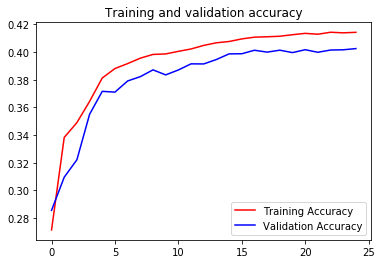

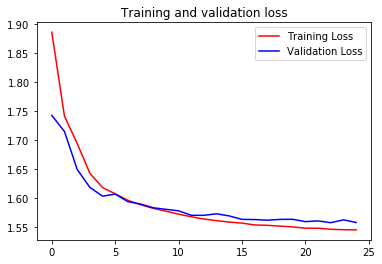

In [53]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)

## Prediction on test set.
## Got an accuracy of 41.8% on test set.

In [54]:
testset_pred=model.predict_classes(test_new)

In [55]:
testset_pred= list(y_le.inverse_transform(testset_pred))

In [56]:
subm.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [57]:
final_subm= pd.DataFrame(data= testset_pred,index=subm['case_id'],columns=['Stay'])

In [58]:
final_subm.to_csv('nn_subm.csv')

In [59]:
df= pd.read_csv('nn_subm.csv')
df.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
